<a href="https://colab.research.google.com/github/MJVNOR/WorkStatistic/blob/master/Tarea_Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import statistics as st
from math import log,sqrt,fabs,floor
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randn

def media(a):
    return np.mean(a)

def mediana(a):
    return st.median(a)
    
def rango(lista):
    return np.max(lista)-np.min(lista)

def desviacion_estandar(a):
    media1 = media(a)
    sum1 = 0
    for i in a:
        sum1 += (i - media1)**2
    return sqrt(sum1/len(a))

def desviacion_estandar_s(a):
    media1 = media(a)
    sum1 = 0
    for i in a:
        sum1 += (i - media1)**2
    return sqrt(sum1/(len(a)-1))

def desviacion_absoluta_promedio(a):
    media1 = media(a)
    sum1 = 0
    for i in a:
        sum1 += fabs(i - media1)
    return sum1/len(a)

def desviacion_absoluta_promedio_problema_6_temperatura(a):
    media1 = 0
    sum1 = 0
    for i in a:
        sum1 += fabs(i - media1)
    return sum1/len(a)

def varianza_muestral_1(lista):
    media1 = media(lista)
    sumatoria = 0
    for elemento in lista:
        sumatoria += (elemento-media1)**2
    n = len(lista)
    return (sumatoria/(n-1))

def varianza_muestral_2(lista):
    media1 = media(lista)
    sumatoria = 0
    for elemento in lista:
        sumatoria += elemento**2 - media1**2
    n = len(lista)
    return sumatoria/n-1

def varianza_muestral_3(lista):
    sumatoria_elevada = 0
    sumatoria = 0
    for elemento in lista:
        sumatoria_elevada += (elemento)**2
        sumatoria += (elemento)
    n = len(lista)
    dividendo = sumatoria_elevada - (sumatoria**2/n)
    #print("sumaelevada: ",sumatoria_elevada,"suma: ",sumatoria )
    return (dividendo/(n-1))

# porcetajes
# Q1 = 0.25
# Q2 = 0.50
# Q3 = 0.75
def cuartil(datos,porcentaje):
    if(len(datos) %2 == 0):
        indice_cuartil = len(datos) * porcentaje
    else:
        indice_cuartil = len(datos) * porcentaje
        indice_cuartil += 1
    indice_cuartil = floor(indice_cuartil)
    return datos[indice_cuartil-1]

def rango_intercuantil(datos):
    return cuartil(datos,0.75) - cuartil(datos,0.25)

def obtener_lista_de_limites(datos):
    limites = []
    n = len(datos)
    k = round(sqrt(n))
    nMax =  np.max(datos)
    nMin =  np.min(datos)
    rango = nMax - nMin
    w = rango / k
    #print(n,k,nMax,nMin,rango,w)

    limite_i = nMin
    for i in range(k):
        if i == 0:
            linf = nMin
            lsup = nMax + w
        else:
            linf = limite_i
            lsup = limite_i + w
        limite_i = limite_i + w
        limites.append([linf,lsup])
    return limites

def obtener_lista_de_frecuencias(datos):
    LSUP, LINF = 1, 0
    frecuencias = []
    limites = obtener_lista_de_limites(datos)
    ii = 0
    for index1, limite_i in enumerate(limites):
        i = 0
        for index2, dato_i in enumerate(datos):
            if index1 == 0:
                if dato_i >= limite_i[LINF] and dato_i <= limite_i[LSUP] :
                    i = i+1
            else:
                if dato_i > limite_i[LINF] and dato_i <= limite_i[LSUP] :
                    i = i+1
        ii = ii+i
        frecuencias.append([limite_i[LINF], limite_i[LSUP],i,ii/n,(i/n)*100,ii,(ii/n)*100])
    tabla = pd.DataFrame(frecuencias, columns=['linf','lsup','fabsoluta','frelativa','fporcentual','Facumulada','Facmporcentual'])
    return tabla

def media_teorica_poblacional(min,max):
    a = min 
    b = max
    dividendo = (b+a)
    return (dividendo/2)

def varianza_teorica_poblacional(min,max):
    a = min
    b = max
    dividendo = (b-a)**2
    return (dividendo/12)

def desviacion_de_la_media(a):
    max = media(a) + desviacion_estandar_s(a)
    min = media(a) - desviacion_estandar_s(a)
    return [min, max]

def desviacion_de_la_media_2(a):
    max = media(a) + 2*desviacion_estandar_s(a)
    min = media(a) - 2*desviacion_estandar_s(a)
    return [min, max]

# Problema #1

In [0]:
a1 = [18,9,13,20,14,4,16,10,14,18]
a2 = [10,13,14,12,12,14,11,16,14,12]
a3 = [15,10,4,18,6,8,12,16,7,10]

print("Media")
print(media(a1),media(a2),media(a3))

print("Desviacion estandar")
print(desviacion_estandar(a1), desviacion_estandar(a2), desviacion_estandar(a3))
print("Algoritmo con mejor media y desciacion estandar es:", desviacion_estandar(a3))
print("Mediana")
print(mediana(a1),mediana(a2),mediana(a3))

print(desviacion_absoluta_promedio(a1), desviacion_absoluta_promedio(a2), desviacion_absoluta_promedio(a3))

Media
13.6 12.8 10.6
Desviacion estandar
4.608687448721165 1.6613247725836147 4.363484845854286
Algoritmo con mejor media y desciacion estandar es: 4.363484845854286
Mediana
14.0 12.5 10.0
3.6799999999999997 1.4 3.72


# Problema #2

a) Calcule la media, el rango y la desviacion estandar de los datos.
Proceso 	  Algoritmo1: 				   Algoritmo2
Media:  	  35.083333333333336 			   36.416666666666664
Mediana: 	  35.0 					   38.0
Varianza1:  	  31.174242424242422 			   30.992424242424246
Varianza2:  	  27.576388888888612 			   27.409722222222474
Varianza3:  	  31.17424242424237 			   30.99242424242419

b) Que algoritmo precenta mas variación o variabilidad? 
	El primer algoritmo

c) Cual algoritmo parece tener mejor comportamiento promedio y porque? 
	 El primero y el tercero porque tienen hacen menos procesos

d) Que diferencias resaltan con respcto al numero de operaciones?
	 los datos de la seria 1 no se inclina mucho pero la seria dos se inclina mas a la derecha



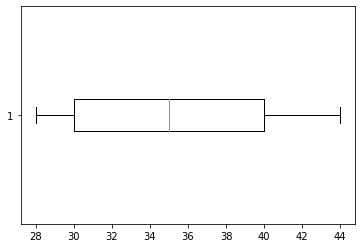

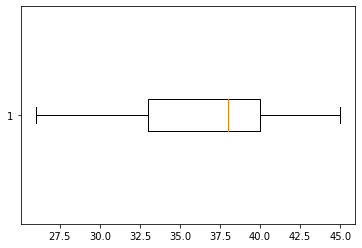

In [0]:
#Tarea2

lista1 = [28,34,30,32,42,28,36,44,30,37,40,40]
lista2 = [34,30,26,38,40,42,35,40,30,39,38,45]
print("a) Calcule la media, el rango y la desviacion estandar de los datos.")
print("Proceso","\t  Algoritmo1:","\t\t\t\t   Algoritmo2")
print("Media: ","\t ",media(lista1),"\t\t\t  ",media(lista2))
print("Mediana:","\t ",mediana(lista1),"\t\t\t\t\t  ",mediana(lista2))
varianza1_1 = varianza_muestral_1(lista1)
varianza2_1 = varianza_muestral_2(lista1)
varianza3_1 = varianza_muestral_3(lista1)
varianza1_2 = varianza_muestral_1(lista2)
varianza2_2 = varianza_muestral_2(lista2)
varianza3_2 = varianza_muestral_3(lista2)
print("Varianza1: ","\t ",varianza1_1,"\t\t\t  ",varianza1_2)
print("Varianza2: ","\t ",varianza2_1,"\t\t\t  ",varianza2_2)
print("Varianza3: ","\t ",varianza3_1,"\t\t\t  ",varianza3_2)
print("\nb) Que algoritmo precenta mas variación o variabilidad? \n\tEl primer algoritmo")

print("\nc) Cual algoritmo parece tener mejor comportamiento promedio y porque? \n\t El primero y el tercero porque tienen hacen menos procesos")

print("\nd) Que diferencias resaltan con respcto al numero de operaciones?\n\t los datos de la seria 1 no se inclina mucho pero la seria dos se inclina mas a la derecha\n")
plt.boxplot(lista1,vert=False, sym="o")
plt.show()
plt.boxplot(lista2,vert=False, sym="o")
plt.show()



# Problema #3


In [0]:
algoritmo1 = [400,200,350,450,480,360,100]
algoritmo2 = [320,350,300,280,290,300,320,400]

print("a) Calcule la media, el rango y la desviacion estandar de los datos.")
print("Proceso","\t  Algoritmo1:","\t\t\t\t   Algoritmo2")
print("Media: ","\t ",media(algoritmo1),"\t\t\t  ",media(algoritmo2))
print("rango:","\t\t ",rango(algoritmo1),"\t\t\t\t\t  ",rango(algoritmo2))
print("Desviacion E:","\t ",desviacion_estandar(algoritmo1),"\t\t\t  ",desviacion_estandar(algoritmo2))
print("Varianza:","\t ",varianza_muestral_1(algoritmo1),"\t\t\t  ",varianza_muestral_1(algoritmo2))

print("\nb) Que algoritmo presenta mayor variabilidad? las diferencias son significativas? \n\t El primero algoritmo tiene un rango mas amplio, la varianza y la desviacion estandar se disparan muy alto")

print("\nc) Que algoritmo tuvo mayor dispersion del total de cruzamientos?\n\t El primer algortmo tiene mayor dispersion")

print("\nd) Considerando que entre mas alta sea la tasa de cruzamiento (total de cruzas/500) el desempeño es mejor, que algoritmo resulta mas conveniente?")
print("\t Encontremos el desempeño de cada algoritmo para tomar una decicion. realizemos un promedio del (total de cruzas/500) por cada algoritmo.")
sum = 0
for elemento in algoritmo1:
    sum += elemento/500
print("Desempeño Algoritmo 1:")
print(sum/len(algoritmo1))
sum = 0
for elemento in algoritmo2:
    sum += elemento/500
print("Desempeño Algoritmo 2:")
print(sum/len(algoritmo2))
print("Por lo tanto concluimos que aunque sea por muy poco el algoritmo 1 es el que presenta mayor desempeño.")

a) Calcule la media, el rango y la desviacion estandar de los datos.
Proceso 	  Algoritmo1: 				   Algoritmo2
Media:  	  334.2857142857143 			   320.0
rango: 		  380 					   120
Desviacion E: 	  126.92597874994958 			   36.40054944640259
Varianza: 	  18795.238095238095 			   1514.2857142857142

b) Que algoritmo presenta mayor variabilidad? las diferencias son significativas? 
	 El primero algoritmo tiene un rango mas amplio, la varianza y la desviacion estandar se disparan muy alto

c) Que algoritmo tuvo mayor dispersion del total de cruzamientos?
	 El primer algortmo tiene mayor dispersion

d) Considerando que entre mas alta sea la tasa de cruzamiento (total de cruzas/500) el desempeño es mejor, que algoritmo resulta mas conveniente?
	 Encontremos el desempeño de cada algoritmo para tomar una decicion. realizemos un promedio del (total de cruzas/500) por cada algoritmo.
Desempeño Algoritmo 1:
0.6685714285714287
Desempeño Algoritmo 2:
0.64
Por lo tanto concluimos que aunque sea por muy

# Problema #4

a)
Proceso 	  Algoritmo1: 				   Algoritmo2 				   Algoritmo3
Media: 		  334.2857142857143 			   320.0 				   286.53846153846155
Rango: 		  380 					   120 					   410
desviacion E: 	  126.92597874994958 			   27.5 				   27.5
Desempeño Algoritmo 3: 0.573076923076923
CUal de los 3 algoritmos crees que es el mejor? 
	El primer algoritmo ya que tiene mejor desempeño
b) Que algoritmo es mas confiable en su promedio: 
	El primer algoritmo ya que si sus datos estan mas parejos
c) Diagrama de caja triple de los datos de los algoritmos


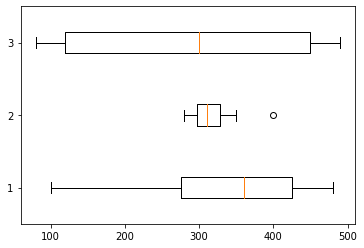

In [0]:
algoritmo3 = [450,400,100,140,300,200,120,100,80,490,460,490,395]
print("a)")
print("Proceso","\t  Algoritmo1:","\t\t\t\t   Algoritmo2","\t\t\t\t   Algoritmo3")
print("Media:","\t\t ",media(algoritmo1),"\t\t\t  ",media(algoritmo2),"\t\t\t\t  ",media(algoritmo3))
print("Rango:","\t\t ",rango(algoritmo1),"\t\t\t\t\t  ",rango(algoritmo2),"\t\t\t\t\t  ",rango(algoritmo3))
print("desviacion E:","\t ",desviacion_estandar(algoritmo1),"\t\t\t  ",desviacion_absoluta_promedio(algoritmo2),"\t\t\t\t  ",desviacion_absoluta_promedio(algoritmo2))

sum = 0
for elemento in algoritmo3:
    sum += elemento/500
print("Desempeño Algoritmo 3:",(sum/len(algoritmo3)))
print("CUal de los 3 algoritmos crees que es el mejor? \n\tEl primer algoritmo ya que tiene mejor desempeño")
print("b) Que algoritmo es mas confiable en su promedio: \n\tEl primer algoritmo ya que si sus datos estan mas parejos")

print("c) Diagrama de caja triple de los datos de los algoritmos")
x = [algoritmo1,algoritmo2,algoritmo3]
plt.boxplot(x,vert=False,sym="o")
plt.show()

# Problema #5

In [0]:
miMuestra = 30
miMedia = 60
miCuasiVarianza = 10
print("Muestra = ",miMuestra)
print("Media = ",miMedia)
print("Cuasivarianza = ",miCuasiVarianza)
print("Cual es la varianza y la desviacion estandar?")
seed(1)
var = (miCuasiVarianza*miMuestra)/(miMuestra-1)
print("varianza: ", var)
print("Desviacion estandar: ",sqrt(var))

Muestra =  30
Media =  60
Cuasivarianza =  10
Cual es la varianza y la desviacion estandar?
varianza:  10.344827586206897
Desviacion estandar:  3.2163376045133845


# Problema #6

a) Sugieren los datos que los termometros estan calibrados a temperatura ideal?,porque? 
	No ya que nomas tres de los 16 termometros estan en 0.0
b) 
   1.-Sugieren los datos que en promedio la muestra de termometros estan bien calibrados? 
	Si ya que el promedio que es igual a  0.088125 ,esto significa que estan calibrados bien ya que estan en aproximadamente 0
   2.-Que tanto se desvia de la temperatura ideal:  1.8173339633581387
   3.-Es esta desviacion un valor que debe preocupar a los fabricantes? si ya que se equibocan por casi 2 grados
c)
   1.-Desviacion absoluta con respecto a la media muestra:  1.34640625
   2.-Desviacion absoluta con respecto a la temperatura ideal:  1.3306250000000002
   3.-Cual desviacion es mejor para medir la temperatura de los termomemotros? 
	La que promedio ya que es lo que tenemos en la muetra
d) Cual considera que es una mejor medida fisica para medir las desviaciones de las temperaturas, la desviacion promedio absoluta 
o la desviacion estandar s?


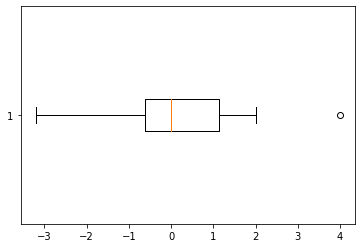

In [0]:
temperaturas = [2.0,0.0,1.5,-2.0,0.0,-3.2,1.0,4.0,0.0,-3.1,-1.2,1.0,-0.43,1.8,0.05,-0.01]
print("a) Sugieren los datos que los termometros estan calibrados a temperatura ideal?,porque? \n\tNo ya que nomas tres de los 16 termometros estan en 0.0")
print("b) \n   1.-Sugieren los datos que en promedio la muestra de termometros estan bien calibrados? \n\tSi ya que el promedio que es igual a ", media(temperaturas),",esto significa que estan calibrados bien ya que estan en aproximadamente 0")
print("   2.-Que tanto se desvia de la temperatura ideal: ", desviacion_estandar(temperaturas))
print("   3.-Es esta desviacion un valor que debe preocupar a los fabricantes? si ya que se equibocan por casi 2 grados")
print("c)")
print("   1.-Desviacion absoluta con respecto a la media muestra: ", desviacion_absoluta_promedio(temperaturas))
print("   2.-Desviacion absoluta con respecto a la temperatura ideal: ", desviacion_absoluta_promedio_problema_6_temperatura(temperaturas))
print("   3.-Cual desviacion es mejor para medir la temperatura de los termomemotros? \n\tLa que promedio ya que es lo que tenemos en la muetra")
print("d) Cual considera que es una mejor medida fisica para medir las desviaciones de las temperaturas, la desviacion promedio absoluta \no la desviacion estandar s?")
print("   \tDesviacion promedio absoluta: ", desviacion_absoluta_promedio(temperaturas))
print("   \tDesviacion estandar s: ", desviacion_estandar_s(temperaturas))
print("   \t la de promedio absoluta porque es la que menos se aleja")
print("f) Son los 10 termometros de la muestra frabricxados por la compañia aceptables o de buena calidad?\n\tNo ya que se equibocan la mayoria por un rango de 1 a casi 10 grados")
print("g) Con base en el inciso anterior, se puede inferir los resultados a todos los termometros frabricados por la compañia \n\tSi ya que agaramos una muestra significativa de la poblacion")

plt.boxplot(temperaturas,vert=False,sym="o")
plt.show()

# Problema #7

a) Determine el primero, el segundo y tercer cuartil. Verifique que los siguientes calculos son correctos.
Los calculos siguientes fueron verificados, son correctos y son los siguientes:
   Min    Max    Q1    Q2    Q3
0  5.3  113.5  90.2  94.8  96.7


b) Elabore un diagrama de caja con los datos originales, esta grafica de caja se hace con los puntos min,max,Q1,Q2,Q3.


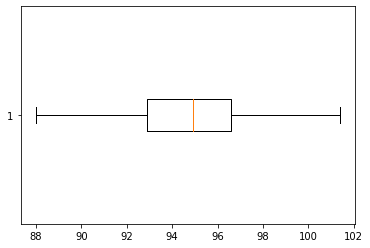


c) Señale los valores sospechosos que pueden ser apartados 'moderados' o 'extremos' con relacion al grupo central de datos
	 Observando la grafica obtenemos que los valores sospechosos extremos son: 5.3, 8.2 y 13.6
	 y los valores moderados son: 74.1 y 113

d) Determine el rango intercuartil (denotado con fs o dispersion de los cuartos en el libro de jay Devore). 
Verifique que la siguiente tabla de valores es correcta.
	 El rango intercuantil es Q3-Q1 = 6.5
	 Entonces 1.5RI =  9.75 Y 3RI = 19.5

	 Por lo tanto para RI tenemos:
	 f1 = 80.45 Y a1 = 90.2

	 Por lo tanto para 1.5RI tenemos
	 f2 = 106.45 Y a2 = 96.7

	 Por lo tanto para 3RI tenemos:
	 F1 = 70.7 Y a2 = 116.2

	 Finalmente podemos decir que la tabla es correcta!

e) Utilice la informacion de la tabla anterior y determine analiticamente los cinco datos atipicos (outliers) y 
etiquetelos si son datos alejados 'moderados' o 'extremos'

	 Los datos moderados son los que estan dentro del rango (f1,Q1)U(Q3,f2) es decir:
	 80.45 <

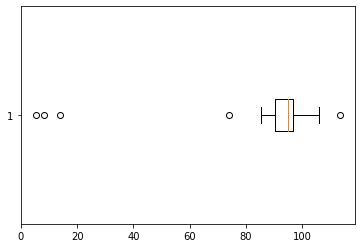

g) Comparar el diagrama de caja del inciso b) con el del inciso f). Comente las caractersticas importantes de la distribucion de los datos. 
Cual de los dos diagramas de caja considera que es mejor y porque para visualizar la distribucion y dispersion de los datos, el 
primer diagrama sin considerar outliers o el segundo diagrama considerando outliers?
	 Analisis propio de los diagramas:
	 Permite conocer la simetria de la distribucion?
	 Diagrama 1: Si
	 Diagrama 2: Si
	 Permite ver la presencia de valores atípicos?
	 Diagrama 1: NO
	 Diagrama 2: Si
	 Considero que el mejor el diagrama 2 porque nos permite tener una mas vision general de los datos.


In [0]:
n=25
datos = [5.3,8.2,13.8,74.1,85.3,88.0,90.2,91.5,92.4,92.9,93.6,94.3,94.8,94.9,95.5,95.8,95.9,96.6,96.7,98.1,99.0,101.4,103.7,106.0,113.5]
Min = np.min(datos)
Max = np.max(datos)
df = pd.DataFrame(datos, columns=['datos']) 

print("a) Determine el primero, el segundo y tercer cuartil. Verifique que los siguientes calculos son correctos.")
print("Los calculos siguientes fueron verificados, son correctos y son los siguientes:")
tabla1 = pd.DataFrame([[Min,Max,cuartil(datos,0.25),cuartil(datos,0.50),cuartil(datos,0.75)]], columns=['Min','Max',"Q1","Q2","Q3"]) 
print(tabla1)
print("\n")
print("b) Elabore un diagrama de caja con los datos originales, esta grafica de caja se hace con los puntos min,max,Q1,Q2,Q3.")

plt.boxplot(datos[5:22],vert=False, sym="o")
plt.show()
print("\nc) Señale los valores sospechosos que pueden ser apartados 'moderados' o 'extremos' con relacion al grupo central de datos")
print("\t Observando la grafica obtenemos que los valores sospechosos extremos son: 5.3, 8.2 y 13.6")
print("\t y los valores moderados son: 74.1 y 113")
print("\nd) Determine el rango intercuartil (denotado con fs o dispersion de los cuartos en el libro de jay Devore). \nVerifique que la siguiente tabla de valores es correcta.")
iqr = rango_intercuantil(datos)
print("\t El rango intercuantil es Q3-Q1 =",iqr)
print("\t Entonces 1.5RI = ",iqr*1.5, "Y 3RI =",iqr*3)
print("\n\t Por lo tanto para RI tenemos:")
print("\t f1 =",cuartil(datos,0.25)-iqr*1.5, "Y a1 =",cuartil(datos,0.25))
print("\n\t Por lo tanto para 1.5RI tenemos")
print("\t f2 =",cuartil(datos,0.75)+iqr*1.5, "Y a2 =",cuartil(datos,0.25)+iqr)
print("\n\t Por lo tanto para 3RI tenemos:")
print("\t F1 =",cuartil(datos,0.25)-iqr*3, "Y a2 =",cuartil(datos,0.75)+iqr*3)
print("\n\t Finalmente podemos decir que la tabla es correcta!")

print("\ne) Utilice la informacion de la tabla anterior y determine analiticamente los cinco datos atipicos (outliers) y \netiquetelos si son datos alejados 'moderados' o 'extremos'")
print("\n\t Los datos moderados son los que estan dentro del rango (f1,Q1)U(Q3,f2) es decir:")
print("\t 80.45 <= x <= 90.2 (por la izquierda) y 96.7 <= x <= 106.5 (por la derecha)")

print("\n\t Los datos extremos son los que estan fuera del rango (F1,f1)U(f2,F2) es decir:")
print("\t x < 70.7 (por la izquierda) y x > 116,2 (por la derecha)")

print("\nf) Construya un nuevo diagrama de caja modificado con los puntos a1,Q1,Q2,Q3,a2 mas los outliers; en esta \ngrafica los datos alejados 'moderados' se marcan con un punto y los datos apartados 'extremos' con un circulo.")
plt.boxplot(datos,vert=False, sym="o")
plt.show()
print("g) Comparar el diagrama de caja del inciso b) con el del inciso f). Comente las caractersticas importantes de la distribucion de los datos. \nCual de los dos diagramas de caja considera que es mejor y porque para visualizar la distribucion y dispersion de los datos, el \nprimer diagrama sin considerar outliers o el segundo diagrama considerando outliers?")
print("\t Analisis propio de los diagramas:")
print("\t Permite conocer la simetria de la distribucion?")
print("\t Diagrama 1: Si")
print("\t Diagrama 2: Si")
print("\t Permite ver la presencia de valores atípicos?")
print("\t Diagrama 1: NO")
print("\t Diagrama 2: Si")

print("\t Considero que el mejor el diagrama 2 porque nos permite tener una mas vision general de los datos.")

# Problema #8

In [0]:
##CAPTURAR DATOS AL ARCHIVO SPSS

# Problema #9

In [0]:
n = 100
datos = [3.82,1.00,5.96,8.99,8.84,9.58,0.14,4.07,8.63,1.38,
         2.45,0.45,0.32,1.64,2.19,0.17,2.85,3.43,5.53,3.57,
         3.71,3.55,9.10,4.66,4.26,3.03,9.75,8.06,9.91,2.56,
         9.51,0.53,7.05,8.16,9.72,4.66,3.00,7.50,3.51,7.75,
         0.74,1.98,0.64,3.58,4.87,5.11,3.73,9.85,0.40,2.30,
         0.04,9.26,1.00,2.56,7.75,6.79,8.09,7.24,0.85,1.32,
         7.52,6.26,1.73,4.04,5.52,7.11,5.55,1.81,9.70,6.86,
         5.28,7.96,8.05,2.62,1.77,8.66,1.14,0.59,7.61,7.38,
         9.86,9.25,9.03,5.44,5.00,6.74,4.89,1.45,0.37,7.96,
         6.71,7.31,5.84,1.52,8.92,3.77,2.00,2.05,3.33,3.25]

print("a) Elabore un histograma de frecuencias relativas utilizando 10 clases y")
print("comente si los datos a simple vista parecen provenir o no de una distribucion")
print("constante. la distibucion uniforme es una funcion constante igual a:")
print("f(x) = 1 / (b-a) , para a <= x <= b , donde a = 0 y b = a")

frecuencias = obtener_lista_de_frecuencias(datos)
frecuencias



a) Elabore un histograma de frecuencias relativas utilizando 10 clases y
comente si los datos a simple vista parecen provenir o no de una distribucion
constante. la distibucion uniforme es una funcion constante igual a:
f(x) = 1 / (b-a) , para a <= x <= b , donde a = 0 y b = a


,linf,lsup,fabsoluta,frelativa,fporcentual,Facumulada,Facmporcentual
0,0.040,10.897,100,1.00,100.0,100,100.0
1,1.027,2.014,11,1.11,11.0,111,111.0
2,2.014,3.001,9,1.20,9.0,120,120.0
3,3.001,3.988,12,1.32,12.0,132,132.0
4,3.988,4.975,7,1.39,7.0,139,139.0
5,4.975,5.962,9,1.48,9.0,148,148.0
6,5.962,6.949,5,1.53,5.0,153,153.0
7,6.949,7.936,10,1.63,10.0,163,163.0
8,7.936,8.923,10,1.73,10.0,173,173.0
9,8.923,9.910,13,1.86,13.0,186,186.0


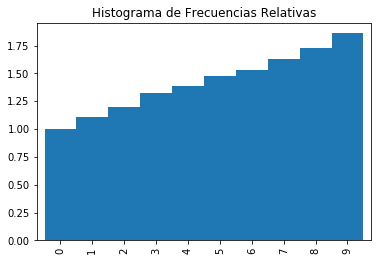

In [0]:
histograma1 = frecuencias['frelativa'].plot(kind='bar',title='Histograma de Frecuencias Relativas',width=1)

In [0]:
print("b) La media poblacion y varianza poblacional teoricas esperadas para numeros aleatorios \ncon distribucion uniforme en el intervalo [a,b] vienen dadas por las formulas")
print("\tMedia teorica poblacional: u = (a+b)/2 ")
print("\tVarianza teorica poblaciona: o^2 = (b-a)^2/12")
min = np.min(datos) 
max = np.max(datos)
print("\tMedia teorica poblacional: ",media_teorica_poblacional(min,max))
print("\tVarianza teorica poblaciona: ",varianza_teorica_poblacional(min,max))
print("c) Obtenga las estadisticas muestrales de media y varianza:")
print("\tMedia muestral: ", media(datos))
print("\tVarianza: ", varianza_muestral_3(datos))
print("Es normal que difieran ya que la medio teorica es poblacional y nosotros estamos usando una muestra.")
print("d) En cuanto espera que difiera la media muestral del valor teorico esperado?")
diferencia =  abs(media(datos) - media_teorica_poblacional(min,max))
print("\t",diferencia)
## EXTRA
print("Extra: \n")
desviacionMedia = desviacion_de_la_media(datos)
desviacionMedia2 = desviacion_de_la_media_2(datos) 
print(desviacionMedia,desviacionMedia2)
datosAcomodados = sorted(datos)
print(datosAcomodados)
print("Porcentaje de datos x-+s = 58%")
print("Porcentaje de datos x-+2s = 100%")



b) La media poblacion y varianza poblacional teoricas esperadas para numeros aleatorios 
con distribucion uniforme en el intervalo [a,b] vienen dadas por las formulas
	Media teorica poblacional: u = (a+b)/2 
	Varianza teorica poblaciona: o^2 = (b-a)^2/12
	Media teorica poblacional:  4.975
	Varianza teorica poblaciona:  8.118075000000003
c) Obtenga las estadisticas muestrales de media y varianza:
	Media muestral:  4.8494
	Varianza:  9.560314787878797
Es normal que difieran ya que la medio teorica es poblacional y nosotros estamos usando una muestra.
d) En cuanto espera que difiera la media muestral del valor teorico esperado?
	 0.1255999999999995
Extra: 

[1.7574241288330228, 7.9413758711669775] [-1.3345517423339546, 11.033351742333956]
[0.04, 0.14, 0.17, 0.32, 0.37, 0.4, 0.45, 0.53, 0.59, 0.64, 0.74, 0.85, 1.0, 1.0, 1.14, 1.32, 1.38, 1.45, 1.52, 1.64, 1.73, 1.77, 1.81, 1.98, 2.0, 2.05, 2.19, 2.3, 2.45, 2.56, 2.56, 2.62, 2.85, 3.0, 3.03, 3.25, 3.33, 3.43, 3.51, 3.55, 3.57, 3.58, 3.71, 3